# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Didan Rahmana Putra
- **Email:** didanrahmana82@gmail.com
- **ID Dicoding:** didanrahmana

## Menentukan Pertanyaan Bisnis


- Pertanyaan 1:
Berapa jumlah pelanggan yang melakukan pembelian untuk kategori produk tertentu di kota tertentu pada tahun yang dipilih?
- Pertanyaan 2:
Bagaimana status pengiriman dan bagaimana pola distribusi waktu pembelian untuk kategori dan kota tersebut pada tahun yang dipilih?

## Import Semua Packages/Library yang Digunakan

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown


## Data Wrangling

### Gathering Data

In [224]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/fiendess/analisis-ecommerce-UAS/main/customers_dataset.csv")
customers_df['customer_city'].value_counts().head(10)


,count
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
campinas,1444
porto alegre,1379
salvador,1245
guarulhos,1189


In [225]:
order_df = pd.read_csv("https://raw.githubusercontent.com/fiendess/analisis-ecommerce-UAS/main/orders_dataset.csv")
order_df['order_status'].value_counts()

,count
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


In [226]:
product_df = pd.read_csv('https://raw.githubusercontent.com/fiendess/analisis-ecommerce-UAS/main/products_dataset.csv')
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [227]:
order_items_df = pd.read_csv('https://raw.githubusercontent.com/fiendess/analisis-ecommerce-UAS/main/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Insight:**
- Distribusi customer paling banyak berasal dari kota besar seperti Sao Paulo dan Rio De Janeiro
- Sebagian besar pesanan berhasil dikirim sedangkan sedikit yang dicancel atau gagal, menunjukan sistem pengiriman berjalan lancar

### Assessing Data

#### Menilai tabel `customers_df`

In [228]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [229]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai tabel `order_df`

In [230]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


#### Menilai tabel `order_items_df`

In [231]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [232]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Menilai tabel `product_df`

In [233]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


**Insight:**
- Terdapat missing value pada product_df dan order_df
- Kolom tanggal masih dalam formta object

### Cleaning Data

#### Membersihkan tabel `customers_df`

In [234]:
customers_df.duplicated().sum()

0

In [235]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [236]:
customers_df.dtypes

,0
customer_id,object
customer_unique_id,object
customer_zip_code_prefix,int64
customer_city,object
customer_state,object


In [237]:
customers_df.nunique()

,0
customer_id,99441
customer_unique_id,96096
customer_zip_code_prefix,14994
customer_city,4119
customer_state,27


In [238]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [239]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Membersihkan tabel `orders_df`

In [240]:
order_df.duplicated().sum()

0

##### Missing values

In [241]:
order_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [242]:
order_df['order_approved_at'] = order_df['order_approved_at'].fillna(order_df['order_purchase_timestamp'])
order_df['order_delivered_carrier_date'] = order_df['order_delivered_carrier_date'].fillna('Unknown')
order_df['order_delivered_customer_date'] = order_df['order_delivered_customer_date'].fillna('Not Delivered')

In [243]:
order_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


#### Membersihkan tabel `product_df`

In [244]:
product_df.duplicated().sum()

0

##### Missing values

In [245]:
product_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [246]:
product_df['product_name_lenght'] = product_df['product_name_lenght'].fillna(product_df['product_name_lenght'].median())
product_df['product_description_lenght'] = product_df['product_description_lenght'].fillna(product_df['product_description_lenght'].median())
product_df['product_photos_qty'] = product_df['product_photos_qty'].fillna(product_df['product_photos_qty'].median())


fill_column = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
for col in fill_column:
    product_df[col] = product_df[col].fillna(product_df[col].median())

product_df.isna().sum()


,0
product_id,0
product_category_name,610
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


#### Membersihkan tabel `order_items_df`

In [247]:
order_items_df.duplicated().sum()

0

In [248]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


**Insight:**
- Tidak ada data duplikat pada customers_df, product_df dan order_df
- Missing value pada order_df dan product_df sudah diisi

## Exploratory Data Analysis (EDA)

### Explore order_df & order_items_df

In [249]:
order_merged = pd.merge(order_df, order_items_df, on='order_id')
order_merged.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


### Explore customers_df

In [250]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
2464,dbf97c157f82439aa4e22e65e10ae811,612db24bd7ec741c98823a46c73aba21,55540,palmares,PE
48231,5cdc045a9409dbfa5db1b7326a598d84,6ab722fe84643343e7ad4213f8587305,38200,frutal,MG
3383,921be88f79a82a0ae7053a435213ef07,a180108edfd35a0ea0ec49427a321ec9,6516,santana de parnaiba,SP
73065,a04be466d26664aa21a464efca20a9a2,fbdb73892c8e05fb7be60b5eedaea946,13190,monte mor,SP
50358,76151a775ac037b2e2acea0033ad43e4,d339ed835c9d8fd6b1e3c5cb60850bc5,9571,sao caetano do sul,SP


### Explore All data

In [251]:
merged_data = pd.merge(pd.merge(order_merged, product_df, on='product_id'), customers_df, on='customer_id')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_approved_at              112650 non-null  object 
 5   order_delivered_carrier_date   112650 non-null  object 
 6   order_delivered_customer_date  112650 non-null  object 
 7   order_estimated_delivery_date  112650 non-null  object 
 8   order_item_id                  112650 non-null  int64  
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12  price                         

In [252]:
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])

selected_city = input("Masukkan Nama Kota: ").strip().lower()
selected_year = int(input("Masukkan Tahun: "))
selected_category = input("Masukkan Kategori Produk: ").strip().lower()

filtered_data = merged_data[
    (merged_data['customer_city'].str.lower() == selected_city) &
    (merged_data['order_purchase_timestamp'].dt.year == selected_year) &
    (merged_data['product_category_name'].str.lower() == selected_category)
]

jumlah_pelanggan = filtered_data['customer_id'].nunique()
order_status_counts = filtered_data['order_status'].value_counts()
order_delivered = order_status_counts.get('delivered', 0)
order_cancelled = order_status_counts.get('canceled', 0)
order_shipped = order_status_counts.get('shipped', 0)

total_pelanggan_city = merged_data[merged_data['customer_city'].str.lower() == selected_city]['customer_id'].nunique()
proporsi = (jumlah_pelanggan / total_pelanggan_city * 100) if total_pelanggan_city > 0 else 0

print("\nHasil Analisis")
print(f"Kota: {selected_city.title()}, Tahun: {selected_year}, Kategori: {selected_category.title()}")
print(f"Jumlah Total Customer di {selected_city.title()}: {total_pelanggan_city}")
print(f"Customer yang Membeli {selected_category.title()} pada {selected_year}: {jumlah_pelanggan}")
print(f"Order Terkirim: {order_delivered}")
print(f"Order Dibatalkan: {order_cancelled}")
print(f"Order dalam Proses Pengiriman: {order_shipped}")
print(f"Proporsi Pelanggan {selected_category.title()}: {proporsi:.2f}%")

Masukkan Nama Kota: rio de janeiro
Masukkan Tahun: 2018
Masukkan Kategori Produk: informatica_acessorios

Hasil Analisis
Kota: Rio De Janeiro, Tahun: 2018, Kategori: Informatica_Acessorios
Jumlah Total Customer di Rio De Janeiro: 6834
Customer yang Membeli Informatica_Acessorios pada 2018: 274
Order Terkirim: 296
Order Dibatalkan: 1
Order dalam Proses Pengiriman: 8
Proporsi Pelanggan Informatica_Acessorios: 4.01%


In [253]:
merged_data.to_csv("all_data.csv", index=False)

**Insight:**
- Proporsi customer yang membeli produk Computer Accessories relatif kecil
di kota Rio de Janeiro hanya 6834 customer dan jumlah customer yang membeli produk Computer Accessories hanya 274 pelanggan yaitu 4% saja
- Sebagian besar pesanan berhasil dikirimkan hanya 1 yang dibatalkan sedangkan yang statusnya masih shipped 8

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-254-1bcfb7653945>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette=colors, edgecolor='black')


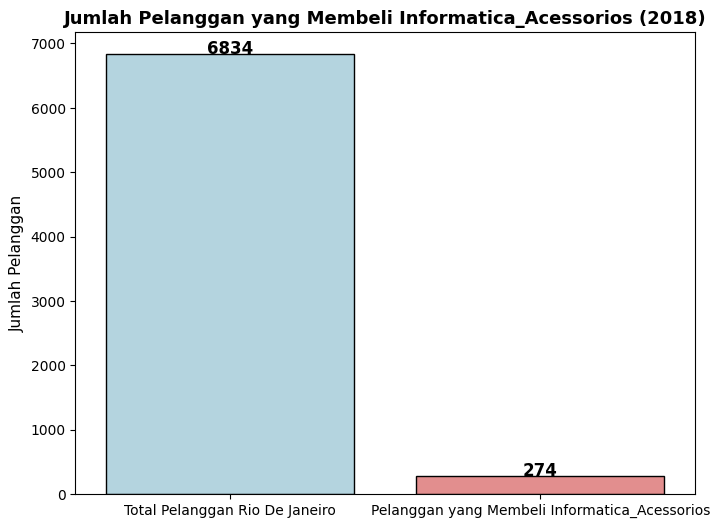

In [254]:
labels = ['Total Pelanggan ' + selected_city.title(), 'Pelanggan yang Membeli ' + selected_category.title()]
values = [total_pelanggan_city, jumlah_pelanggan]
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=values, palette=colors, edgecolor='black')

for i, v in enumerate(values):
    plt.text(i, v + 5, str(v), ha='center', fontsize=12, fontweight='bold')

plt.title(f"Jumlah Pelanggan yang Membeli {selected_category.title()} ({selected_year})", fontsize=13, fontweight='bold')
plt.ylabel("Jumlah Pelanggan", fontsize=11)
plt.xticks(fontsize=10)
plt.show()


### Pertanyaan 2:

<ipython-input-255-947f3ef01d84>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_status_labels, y=order_status_values, palette=colors_status, edgecolor='black')


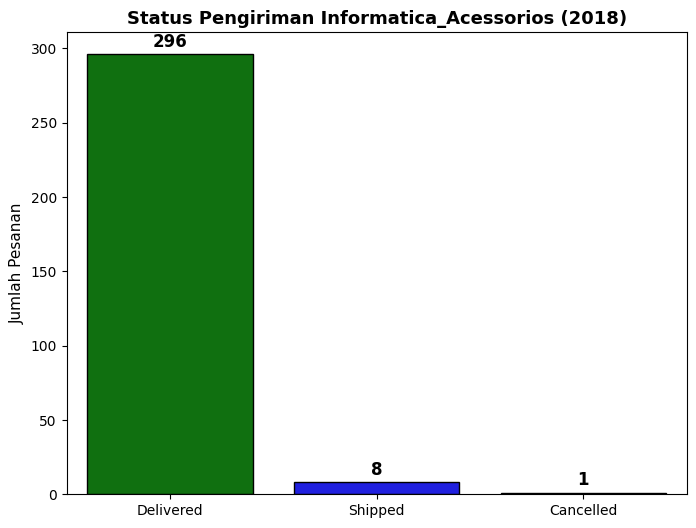

In [255]:
order_status_labels = ['Delivered', 'Shipped', 'Cancelled']
order_status_values = [order_delivered, order_shipped, order_cancelled]
colors_status = ['green', 'blue', 'red']

plt.figure(figsize=(8, 6))
sns.barplot(x=order_status_labels, y=order_status_values, palette=colors_status, edgecolor='black')

for i, v in enumerate(order_status_values):
    plt.text(i, v + 5, str(v), ha='center', fontsize=12, fontweight='bold')

plt.title(f"Status Pengiriman {selected_category.title()} ({selected_year})", fontsize=13, fontweight='bold')
plt.ylabel("Jumlah Pesanan", fontsize=11)
plt.show()

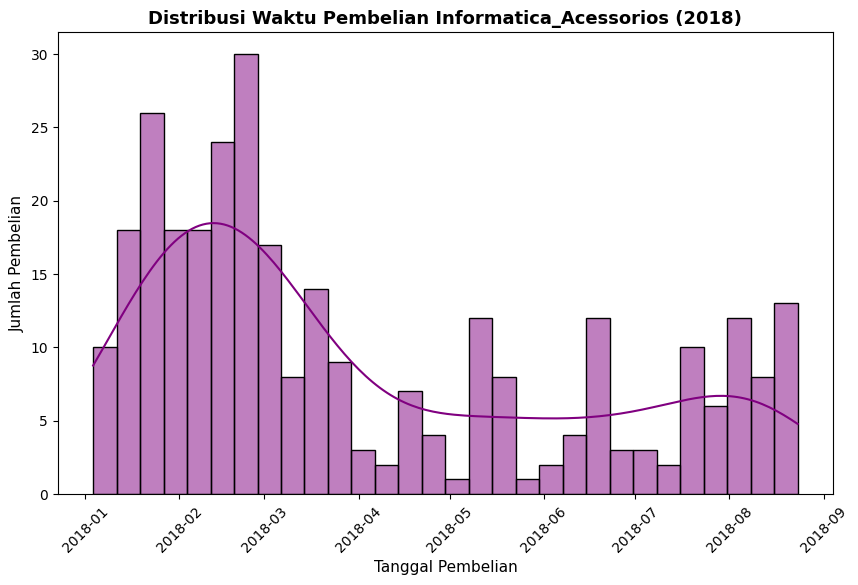

In [256]:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['order_purchase_timestamp'], bins=30, kde=True, color='purple')

plt.title(f"Distribusi Waktu Pembelian {selected_category.title()} ({selected_year})", fontsize=13, fontweight='bold')
plt.ylabel("Jumlah Pembelian", fontsize=11)
plt.xlabel("Tanggal Pembelian", fontsize=11)
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Berdasarkan data yang telah diperoleh dan divisualisasikan dapat diketahui tingkat pembelian tahun 2018 produk dengan kategori Computer Acessories pada Customer yang berasal dari Kota Rio de Janeiro yaitu 4.0% dari Jumlah total customer Kota Rio de Janeiro yang belanja seluruh kategori yang ada

- Sedangkan untuk status pengiriman berjalan dengan lancar hanya 1 order yang gagal atau dibatalkan, distribusi waktu pembelian untuk kategori computer accesories cenderung menurun tiap bulannya

## Analisis Lanjutan (Opsional)

## Conclusion

In [260]:
conclusion_1 = f"""
### Conclution Pertanyaan 1
Pada tahun {selected_year}, kategori {selected_category.title()} di Kota {selected_city.title()} memiliki proporsi pelanggan sebesar {proporsi:.2f}% dari total pelanggan.

Jika jumlah pelanggan meningkat dibandingkan tahun sebelumnya, maka hal ini dapat mengindikasikan peningkatan minat dan permintaan terhadap produk dalam kategori tersebut.
Sebaliknya, jika terjadi penurunan, maka perlu dilakukan analisis lebih lanjut untuk mengidentifikasi faktor yang mempengaruhi turunnya minat pelanggan, seperti persaingan pasar, harga, atau strategi pemasaran.
Evaluasi secara berkala terhadap tren penjualan dan strategi pemasaran yang tepat dapat membantu meningkatkan performa kategori {selected_category.title()} di tahun-tahun berikutnya.
"""

conclusion_2 = f"""
### Conclution Pertanyaan 2
Proses pengiriman pesanan di Kota {selected_city.title()} pada tahun {selected_year} berjalan { "dengan baik" if order_cancelled == 0 else "dengan beberapa kendala" }.

Sebanyak {order_delivered} pesanan telah berhasil dikirim,
{order_shipped} pesanan masih dalam proses pengiriman,
Dan {order_cancelled} pesanan dibatalkan.
"""

display(Markdown(conclusion_1))
display(Markdown(conclusion_2))



### Conclution Pertanyaan 1  
Pada tahun 2018, kategori Informatica_Acessorios di Kota Rio De Janeiro memiliki proporsi pelanggan sebesar 4.01% dari total pelanggan.

Jika jumlah pelanggan meningkat dibandingkan tahun sebelumnya, maka hal ini dapat mengindikasikan peningkatan minat dan permintaan terhadap produk dalam kategori tersebut.
Sebaliknya, jika terjadi penurunan, maka perlu dilakukan analisis lebih lanjut untuk mengidentifikasi faktor yang mempengaruhi turunnya minat pelanggan, seperti persaingan pasar, harga, atau strategi pemasaran.
Evaluasi secara berkala terhadap tren penjualan dan strategi pemasaran yang tepat dapat membantu meningkatkan performa kategori Informatica_Acessorios di tahun-tahun berikutnya.



### Conclution Pertanyaan 2  
Proses pengiriman pesanan di Kota Rio De Janeiro pada tahun 2018 berjalan dengan beberapa kendala.

Sebanyak 296 pesanan telah berhasil dikirim,
8 pesanan masih dalam proses pengiriman,
Dan 1 pesanan dibatalkan.
